In [113]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [114]:
import numpy as np
import pandas as pd

In [115]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [116]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy import desc

In [117]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [118]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [119]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [120]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [121]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [122]:
# Inspect the tables and columns
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [123]:
# Inspect the columns
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [124]:
#first row of Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29479848608>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [125]:
#First row of Station table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29479852888>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [126]:
#Rows of Station table
Station_data = session.query(Station.station,Station.latitude,Station.elevation,Station.longitude,Station.id,Station.name).all()
Station_data

[('USC00519397', 21.2716, 3.0, -157.8168, 1, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 21.4234, 14.6, -157.8015, 2, 'KANEOHE 838.1, HI US'),
 ('USC00514830',
  21.5213,
  7.0,
  -157.8374,
  3,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 21.3934, 11.9, -157.9751, 4, 'PEARL CITY, HI US'),
 ('USC00518838', 21.4992, 306.6, -158.0111, 5, 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523',
  21.33556,
  19.5,
  -157.71139,
  6,
  'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281',
  21.45167,
  32.9,
  -157.84888999999998,
  7,
  'WAIHEE 837.5, HI US'),
 ('USC00511918',
  21.3152,
  0.9,
  -157.9992,
  8,
  'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 21.3331, 152.4, -157.8025, 9, 'MANOA LYON ARBO 785.2, HI US')]

# Exploratory Climate Analysis

#### Precipitation Analysis

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-24', '2017-08-24')).order_by(Measurement.date).all()
last_12_months_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [106]:
# Calculate the date 1 year ago from the last data point in the database (to do)

#Query to get the last datepoint
last_data_point = session.query(Measurement.date).order_by(sqlalchemy.desc(Measurement.date)).first()
last_date = last_data_point.date

# Get one year ago date
one_year_ago_date = pd.to_datetime(last_date) - timedelta(hours = 8760)
one_year_ago_date

Timestamp('2016-08-23 00:00:00')

In [91]:
# Use Pandas Plotting with Matplotlib to plot the data
df_prcp = pd.DataFrame(last_12_months_data, columns=['date', 'prcp'])

# Reset index to date and sort the dataframe by date
df_prcp.set_index("date")


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

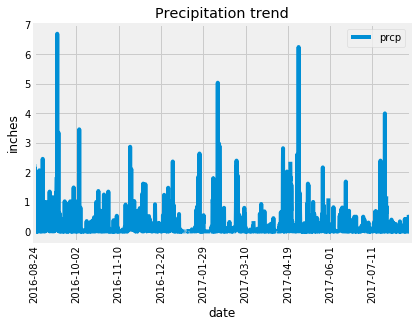

In [92]:

#Plot the results using the DataFrame plot method.
df_prcp.plot(x ='date', y='prcp')
plt.title("Precipitation trend")
plt.ylabel("inches")
plt.xticks(rotation=90)

In [107]:
#Use Pandas to print the summary statistics for the precipitation data.

df_prcp.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### Station Analysis

Total number of stations

In [127]:
#Design a query to calculate the total number of stations.

# Unique stations
Unique_station_data = session.query(Station.station).count()

print("The total number of unique stations are {}".format(Unique_station_data))

The total number of unique stations are 9


Most active stations
Design a query to find the most active stations.
List the stations and observation counts in descending order
Store station with the highest number of observations as a variable

In [21]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order.
    
station_count = func.count(Measurement.id).label('count')
station_group_counts = session.query(Measurement.station, station_count).group_by(Measurement.station).order_by(desc(station_count))
for station in station_group_counts:
    print(station)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
#Which station has the highest number of observations?
station_count = func.count(Measurement.id).label('count2')

temp = session.query(Measurement.station, station_count).group_by(Measurement.station).subquery()

temp2 = session.query(temp.c.station,func.max(temp.c.count2))

for Station in temp2:
    print(Station.station)

USC00519281


In [129]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Average_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print("Lowest temperature of most active station is {}".format(lowest_temperature))
print("Highest temperature of most active station is {}".format(highest_temperature))
print("Average temperature of most active station is {}".format(Average_temperature))

Lowest temperature of most active station is [(54.0,)]
Highest temperature of most active station is [(85.0,)]
Average temperature of most active station is [(71.66378066378067,)]


In [144]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).
last_12_months_tempdata = session.query(Measurement.station,Measurement.date, Measurement.tobs).filter(Measurement.date.between('2016-08-24', '2017-08-24')).all()
last_12_months_tempdata

#Filter by the station with the highest number of observations.
observation_count = func.count(Measurement.tobs).label('count')
temp1 = session.query(Measurement.station, observation_count).group_by(Measurement.station).order_by(desc("count"))
for stations in temp1:
    print (stations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


Text(0, 0.5, 'Frequency')

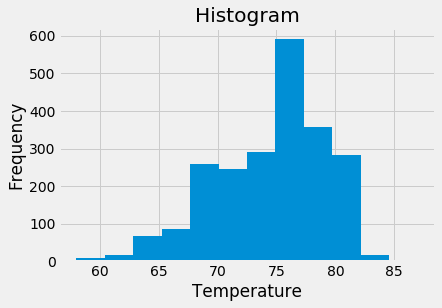

In [145]:
# Use Pandas to read the stations temperature data

df_temperature = pd.DataFrame(last_12_months_tempdata, columns=['station','date', 'tobs'])
df_temperature_tobs = df_temperature["tobs"]
df_temperature_tobs.head()
#Plot the results as a histogram with bins=12.
hist = df_temperature_tobs.hist(bins=12)
plt.title("Histogram")
plt.xlabel("Temperature")
plt.ylabel("Frequency")


## Bonus Challenge Assignment

#### Temperature Analysis II

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
list1 = calc_temps('2012-02-28', '2012-03-05')

In [27]:
def calc_temps_last_year(start_date, end_date):
    #convert string format to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    #Calculate last year date
    start_date_lastyear = start_date - dt.timedelta(days=365)
    end_date_lastyear = end_date - dt.timedelta(days=365)
    #Calculate dateformat back to string format
    start_date_lastyear1 = start_date_lastyear.strftime('%Y-%m-%d')
    end_date_lastyear1 = end_date_lastyear.strftime('%Y-%m-%d')
    
    return(calc_temps(start_date_lastyear1, end_date_lastyear1))

temp_list = calc_temps_last_year('2012-02-28', '2012-03-05')
temp_list

[(61.0, 70.08928571428571, 75.0)]

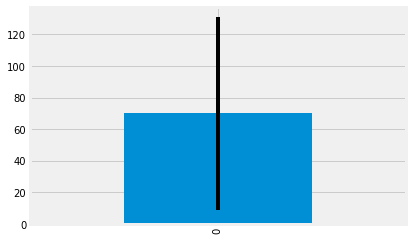

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
last_year_data_df = pd.DataFrame(temp_list, columns = ["min_temp","avr_temp","max_temp"])
last_year_data_df["avr_temp"].plot(kind="bar", yerr =[last_year_data_df["min_temp"],last_year_data_df["max_temp"]])

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def calc_rain_last_year(start_date,end_date):
    #convert string format to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    #Calculate last year date
    start_date_lastyear = start_date - dt.timedelta(days=365)
    end_date_lastyear = end_date - dt.timedelta(days=365)
    #Calculate dateformat back to string format
    start_date_lastyear1 = start_date_lastyear.strftime('%Y-%m-%d')
    end_date_lastyear1 = end_date_lastyear.strftime('%Y-%m-%d')
    
    return(calc_temps(start_date_lastyear1, end_date_lastyear1))

    

In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]